In [191]:
from CoolProp.CoolProp import PropsSI

In [192]:
def heat_power_demand(thermal_cond, thickness, insulator_area, desired_temperature, unpowered_temperature):
    heat_transfer_coeff = thermal_cond / thickness # U = k/L
    delta_temperature = desired_temperature - unpowered_temperature
    heat_demand = heat_transfer_coeff * insulator_area * delta_temperature
    return heat_demand

thermal_cond_material = {
    "Polyurethane Foam":0.022,
    "Reinforced concrete":2.3,
    "Concrete":0.11
}

room_size = [3,2,2] # m x,y,z
outside_temp = 15 + 273.15 # C
desired_temp = -10 + 273.15 # C
wall_thickness = 15 # cm
floor_thickness = 100 # cm

walls_area = room_size[0]*room_size[2]*2 + room_size[1]*room_size[2]
floor_area = room_size[0]*room_size[1]*2
total_area = walls_area + floor_area # m^2

hpd = heat_power_demand(thermal_cond_material["Polyurethane Foam"], wall_thickness/100, total_area, desired_temp, outside_temp)
print(f"Heat power demand: {hpd} kW")

Heat power demand: -102.66666666666666 kW


In [193]:

cond_temp = outside_temp + 20
evap_temp = desired_temp - 10

In [194]:
#PropsSI("H", "T", evap_temp, "Q", 0, "R290")
#PropsSI("H", "T", -25, "Q", 0, "R134a")
#PropsSI("H", "P", 100000, "Q", 1, "R134a")

In [195]:
outside_temp = 15 + 273.15 # C
desired_temp = -10 + 273.15 # C

cond_temp = outside_temp + 20
evap_temp = desired_temp - 10

fluid = "R290"
t_2 = evap_temp # T_evap (K)
t_4 = cond_temp # T_cond (K)
eta_s = 0.8 # Efficiency assumed to be 80%
heat_evap = 2e5 # Nominal heat power (W)

print("t_2: ",t_2)
print("t_4: ",t_4)

p_2 = PropsSI("P", "T", t_2, "Q", 1, fluid)
p_4 = PropsSI("P", "T", t_4, "Q", 0, fluid)

h_2 = PropsSI("H", "T", t_2, "Q", 1, fluid)
s_2 = PropsSI("S", "T", t_2, "Q", 1, fluid)

p_3 = p_4 # pressure remains same after compressor / before expansion
h_3s = PropsSI("H", "S", s_2, "P", p_3, fluid)
h_3 = h_2 + (h_3s - h_2) / eta_s # enthalpy considering compressor efficiency

h_4 = PropsSI("H", "T", t_4, "Q", 0, fluid)
h_1 = h_4 # enthalpy remains constant in expansion. refer to ph graph
p_1 = p_2 # pressure remains constant in evaporation.

# no calculamos s_1, s_3, s_4, t_1, t_3

m = heat_evap / (h_2 - h_1) # mass flow rate kg/s. Are these enthalpies correct? or should we get h_4, h_3
power = m * (h_3 - h_2) # compressor power
cop = abs(heat_evap) / power
heat_cond = abs(heat_evap) - power

print(cop)
print(power)
print(heat_cond)

t_2:  253.14999999999998
t_4:  308.15
2.7492250284433646
72747.77362013242
127252.22637986758


298.15 300.15 302.15 304.15 306.15 308.15 310.15 312.15 314.15 316.15
2.1219758825632935
2.2308871431473407
2.347255813436239
2.4718386683844233
2.605498814512353
2.7492250284433646
2.9041554746595724
3.0716070045017045
3.2531116310317105
3.450462318096574


Text(0.5, 1.0, 'COP vs Evaporated T')

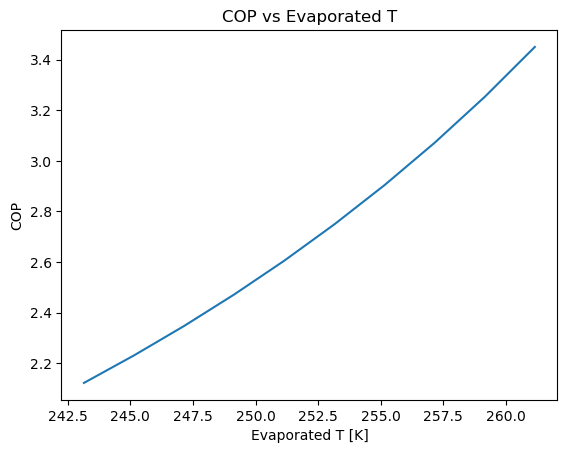

In [196]:
import matplotlib.pyplot as plt
import numpy as np

outside_temp = 15 + 273.15 # C
desired_temp = -10 + 273.15 # C

cond_temp = outside_temp + 20
evap_temp = desired_temp - 10

evap_temp_list = np.arange(evap_temp - 10 , evap_temp + 10 , 2)
#cond_temp_list = np.arange(evap_temp - 10 , evap_temp + 10 , 2)
cop_list = []
#cond_temp = -20+273
print(*cond_temp_list)

for evap_temp in (evap_temp_list):
    fluid = "R290"
    t_2 = evap_temp # T_evap (K)
    t_4 = cond_temp # T_cond (K)
    eta_s = 0.8 # Efficiency assumed to be 80%
    heat_evap = 2e5 # Nominal heat power (W)

    p_2 = PropsSI("P", "T", t_2, "Q", 1, fluid)
    p_4 = PropsSI("P", "T", t_4, "Q", 0, fluid)

    h_2 = PropsSI("H", "T", t_2, "Q", 1, fluid)
    s_2 = PropsSI("S", "T", t_2, "Q", 1, fluid)

    p_3 = p_4 # pressure remains same after compressor / before expansion
    h_3s = PropsSI("H", "S", s_2, "P", p_3, fluid)
    h_3 = h_2 + (h_3s - h_2) / eta_s # enthalpy considering compressor efficiency

    h_4 = PropsSI("H", "T", t_4, "Q", 0, fluid)
    h_1 = h_4 # enthalpy remains constant in expansion. refer to ph graph
    p_1 = p_2 # pressure remains constant in evaporation.

    # no calculamos s_1, s_3, s_4, t_1, t_3

    m = heat_evap / abs(h_2 - h_1) # mass flow rate kg/s. Are these enthalpies correct? or should we get h_4, h_3
    power = m * abs(h_3 - h_2) # compressor power
    cop = abs(heat_evap) / power
    heat_cond = abs(heat_evap) - power

    print(cop)
    #print(power)
    #print(heat_cond)
    cop_list.append(cop)


plt.plot(evap_temp_list, cop_list)

# Plotting multiple lines on a single plot
#plt.plot(x, y1, label='Sin(x)', color='b')
#plt.plot(x, y2, label='Cos(x)', color='r', linestyle='--')
 
# Adding labels and title
plt.xlabel('Evaporated T [K]')
plt.ylabel('COP')
plt.title('COP vs Evaporated T')

evap_temp:  253.14999999999998
cond_temp:  298.15
3.6132021774116314
evap_temp:  253.14999999999998
cond_temp:  300.15
3.413284658746162
evap_temp:  253.14999999999998
cond_temp:  302.15
3.2286232560111494
evap_temp:  253.14999999999998
cond_temp:  304.15
3.0573907547944668
evap_temp:  253.14999999999998
cond_temp:  306.15
2.8980342330889712
evap_temp:  253.14999999999998
cond_temp:  308.15
2.7492250284433646
evap_temp:  253.14999999999998
cond_temp:  310.15
2.609819216680336
evap_temp:  253.14999999999998
cond_temp:  312.15
2.478826104185858
evap_temp:  253.14999999999998
cond_temp:  314.15
2.3553828895042948
evap_temp:  253.14999999999998
cond_temp:  316.15
2.238734117257892
  cop_list:  [3.6132021774116314, 3.413284658746162, 3.2286232560111494, 3.0573907547944668, 2.8980342330889712, 2.7492250284433646, 2.609819216680336, 2.478826104185858, 2.3553828895042948, 2.238734117257892]


Text(0.5, 1.0, 'COP vs Condensated T')

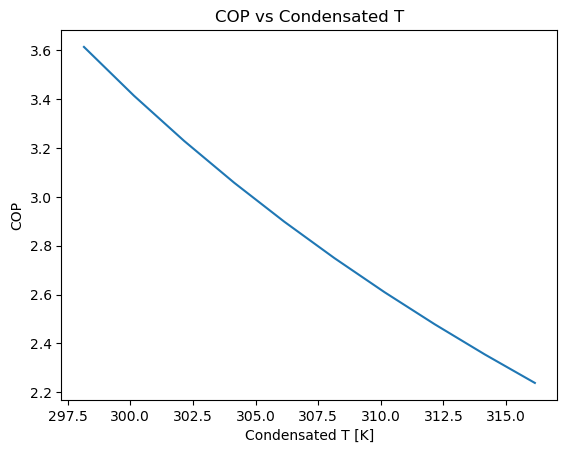

In [197]:
import matplotlib.pyplot as plt
import numpy as np

outside_temp = 15 + 273.15 # C
desired_temp = -10 + 273.15 # C

cond_temp = outside_temp + 20
evap_temp = desired_temp - 10

#evap_temp_list = np.arange(evap_temp - 10 , evap_temp + 10 , 2)
cond_temp_list = np.arange(cond_temp - 10 , cond_temp + 10 , 2)

cop_list = []
#cond_temp = -20+273
#print(*cond_temp_list)

for cond_temp in (cond_temp_list):
    print("evap_temp: ",evap_temp)
    print("cond_temp: ",cond_temp)
    fluid = "R290"
    t_2 = evap_temp # T_evap (K)
    t_4 = cond_temp # T_cond (K)
    eta_s = 0.8 # Efficiency assumed to be 80%
    heat_evap = 2e5 # Nominal heat power (W)

    p_2 = PropsSI("P", "T", t_2, "Q", 1, fluid)
    p_4 = PropsSI("P", "T", t_4, "Q", 0, fluid)

    h_2 = PropsSI("H", "T", t_2, "Q", 1, fluid)
    s_2 = PropsSI("S", "T", t_2, "Q", 1, fluid)

    p_3 = p_4 # pressure remains same after compressor / before expansion
    h_3s = PropsSI("H", "S", s_2, "P", p_3, fluid)
    h_3 = h_2 + (h_3s - h_2) / eta_s # enthalpy considering compressor efficiency

    h_4 = PropsSI("H", "T", t_4, "Q", 0, fluid)
    h_1 = h_4 # enthalpy remains constant in expansion. refer to ph graph
    p_1 = p_2 # pressure remains constant in evaporation.

    # no calculamos s_1, s_3, s_4, t_1, t_3

    m = heat_evap / abs(h_2 - h_1) # mass flow rate kg/s. Are these enthalpies correct? or should we get h_4, h_3
    power = m * abs(h_3 - h_2) # compressor power
    cop = abs(heat_evap) / power
    heat_cond = abs(heat_evap) - power

    #print(cop)
    #print(power)
    #print(heat_cond)
    cop_list.append(cop)


plt.plot(cond_temp_list, cop_list)

# Plotting multiple lines on a single plot
#plt.plot(x, y1, label='Sin(x)', color='b')
#plt.plot(x, y2, label='Cos(x)', color='r', linestyle='--')
 
# Adding labels and title
plt.xlabel('Condensated T [K]')
plt.ylabel('COP')
plt.title('COP vs Condensated T')

Now, let's plot both the condensated T° and the evaporated T° in the same 3D graph to compare values:

In [ ]:
from matplotlib import cm

fig, ax = plt.subplots(1, figsize=(12, 7.5), subplot_kw={"projection": "3d"})

X, Y = np.meshgrid(t_4_range, t_2_range)

surf = ax.plot_surface(X, Y, cop_parametric.values, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel("Condensation temperature in °C")
ax.set_ylabel("Evaporation temperature in °C")
ax.set_zlabel("COP")
ax.view_init(elev=30, azim=225)
ax.set_box_aspect(aspect=None, zoom=0.9)
fig.colorbar(surf, shrink=0.5, aspect=15)
plt.tight_layout()